关键词: 直线拟合, 平面拟合, ransac, 最小二乘
--

In [12]:
%pylab
%pylab inline

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


In [89]:
'''
2016-9-18 09:49:50
http://scikit-learn.org/stable/auto_examples/linear_model/plot_ransac.html
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RANSACRegressor.html
'''

import numpy as np
from matplotlib import pyplot as plt

from sklearn import linear_model, datasets

n_samples = 1000
n_outliers = 800
X, y, coef = datasets.make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, noise=10,
                                      coef=True, random_state=0)

X.shape, y.shape

((1000, 1), (1000,))

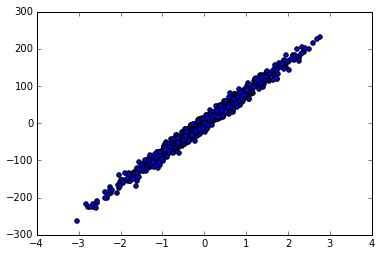

In [90]:
# plt.plot(X, y)
plt.scatter(X, y)

In [91]:
# Add outlier data
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

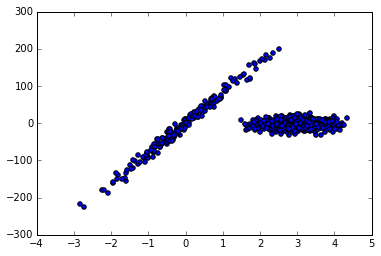

In [92]:
plt.scatter(X, y)

In [93]:
# %%timeit
model = linear_model.LinearRegression()

In [94]:
# %%timeit
# Fit line using all data
model = linear_model.LinearRegression() #646ns
model.fit(X, y) #232us

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [95]:
# %%timeit
# Robustly fit linear model with RANSAC algorithm
model_ransac = linear_model.RANSACRegressor(linear_model.LinearRegression())
model_ransac.fit(X, y) #n_outliers = 50时 3ms; n_outliers = 800 时 13.9ms
inlier_mask = model_ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

In [96]:
# Predict data of estimated models
line_X = np.arange(-5, 5)
line_y = model.predict(line_X[:, np.newaxis])
line_y_ransac = model_ransac.predict(line_X[:, np.newaxis])

Estimated coefficients (true, normal, RANSAC):
(array(82.1903908407869), array([ 9.12256648]), array([[ 0.62188255]]))


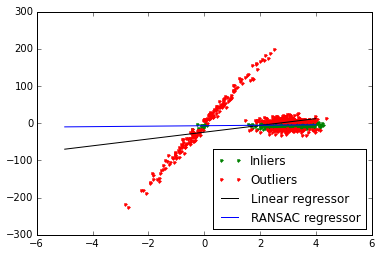

In [97]:
# Compare estimated coefficients
print("Estimated coefficients (true, normal, RANSAC):")
print(coef, model.coef_, model_ransac.estimator_.coef_)

plt.plot(X[inlier_mask], y[inlier_mask], '.g', label='Inliers')
plt.plot(X[outlier_mask], y[outlier_mask], '.r', label='Outliers')
plt.plot(line_X, line_y, '-k', label='Linear regressor')
plt.plot(line_X, line_y_ransac, '-b', label='RANSAC regressor')
plt.legend(loc='lower right')
plt.show()